In [3]:
#This is not my Code. ChatGPT generates this one. My Goal is to understand what every step is trying to achieve. That's why I'm commenting "everything".

In [4]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
#Load TrainData and TestData and each label into their variables. 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()  

In [6]:
x_train = x_train.astype("float32") / 255.0 #Converting everything to Float and normalizing to [0,1] White to Black 
x_test  = x_test.astype("float32") / 255.0
# CNN expects (H, W, C)
x_train = np.expand_dims(x_train, -1) #Expands the array by one position at the end for grayscale
x_test  = np.expand_dims(x_test, -1)

In [7]:
#A Keras Layer block that pipelines randomRotation and RandomTranslation for every picture everytime it gets called.
#The Goal is that the model does train on a slightly different version of the same picture, to generalize more and reduce Overfitting. 
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.08),
    tf.keras.layers.RandomTranslation(0.05, 0.05),
], name="augment")

In [8]:
#Definition
inputs = tf.keras.Input(shape=(28, 28, 1)) #Parameter that each picture has to fulfill
x = data_augmentation(inputs) #use the Keras Layer block from above

x = tf.keras.layers.Conv2D(32, 3, activation="relu")(x) #Convolution 2D Layer with 32 filters and 3x3 Kernel. ReLu for non-linear relation. Output 26x26x32 Tensor. 
x = tf.keras.layers.Conv2D(32, 3, activation="relu")(x) #Again but now each Layer combined. Output 24x24x32 Tensor.
x = tf.keras.layers.MaxPooling2D()(x) #Iterates via 2x2-Block through every Feature Map and takes the highest number. Reduces every Layer to 12x12x32. -> less processing load
x = tf.keras.layers.Dropout(0.25)(x) #Randomly sets 25% to Zero. Unchanged Data(75%) gets raised by 1.333. -> reduces Overfitting. Can't use the same Neurons every time.  

x = tf.keras.layers.Conv2D(64, 3, activation="relu")(x) #Output 10x10x64 Tensor. 
x = tf.keras.layers.Conv2D(64, 3, activation="relu")(x) #Output 8x8x64 Tensor. 
x = tf.keras.layers.MaxPooling2D()(x) #Output 4x4x64 Tensor
x = tf.keras.layers.Dropout(0.25)(x) #Again to reduce Overfitting.

x = tf.keras.layers.Flatten()(x) # 4x4x64 = Vector with 1024 Features. From 3D-Tensor to 1D-Tensor.
x = tf.keras.layers.Dense(128, activation="relu")(x) #Out of 1024 Features calculate 128 super features that are more precise. More than 128 Neurons might cause overfitting, less might lose important information
x = tf.keras.layers.Dropout(0.5)(x) #To reduce Overfitting, deactivate half of all the neurons and multiply the others by 2 = 1 / (1-0.5)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x) #10 Features because we have numbers from 0-9. softmax because we want probabilities.

model = tf.keras.Model(inputs, outputs) #Build a Model that starts at inputs and ends at outputs
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3), #Gradient-Descent-Algorythm(Adam), 0.001 Starting Learning rate, How big are the steps to correct a failure
    loss="sparse_categorical_crossentropy", #sparse to reduce memory usage, calculate the loss
    metrics=["accuracy"] #Tells me how accurate my model is during training
)
model.summary() #Shows me the details of my model

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ augment (Sequential)            │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 197,482 (771.41 KB)

 Trainable params: 197,482 (771.41 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True), #if, for example, the validation loss does not improve over three cycles, training stops. restore_best_weights takes the best weights not the last
    tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5) #if, for example, the validation loss does not improve for two cycles, learn rate gets halved.
]
history = model.fit( #train the model
    x_train, y_train, #training data
    validation_split=0.1, #use 10% as validation data
    epochs=15, #15 cycles
    batch_size=128, #128 pictures 
    callbacks=callbacks, #uses the callback code from above
    verbose=2
)

Epoch 1/15
422/422 - 18s - 42ms/step - accuracy: 0.8316 - loss: 0.5165 - val_accuracy: 0.9797 - val_loss: 0.0649 - learning_rate: 1.0000e-03
Epoch 2/15
422/422 - 15s - 35ms/step - accuracy: 0.9455 - loss: 0.1829 - val_accuracy: 0.9853 - val_loss: 0.0447 - learning_rate: 1.0000e-03
Epoch 3/15
422/422 - 14s - 34ms/step - accuracy: 0.9602 - loss: 0.1354 - val_accuracy: 0.9892 - val_loss: 0.0419 - learning_rate: 1.0000e-03
Epoch 4/15
422/422 - 14s - 34ms/step - accuracy: 0.9671 - loss: 0.1126 - val_accuracy: 0.9903 - val_loss: 0.0318 - learning_rate: 1.0000e-03
Epoch 5/15
422/422 - 14s - 34ms/step - accuracy: 0.9718 - loss: 0.0962 - val_accuracy: 0.9913 - val_loss: 0.0309 - learning_rate: 1.0000e-03
Epoch 6/15
422/422 - 14s - 34ms/step - accuracy: 0.9736 - loss: 0.0892 - val_accuracy: 0.9918 - val_loss: 0.0300 - learning_rate: 1.0000e-03
Epoch 7/15
422/422 - 14s - 34ms/step - accuracy: 0.9766 - loss: 0.0798 - val_accuracy: 0.9928 - val_loss: 0.0283 - learning_rate: 1.0000e-03
Epoch 8/15
42

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0) #use the test data to check how accurate is my model
print(f"Test accuracy: {test_acc:.4f}")

y_pred = model.predict(x_test, verbose=0).argmax(axis=1) #probability for each Number, argmax takes the highest probability. y_pred array for each number in every picture.
print(classification_report(y_test, y_pred)) #compares each label with y_pred and tells me which numbers my model identifies better than others


Test accuracy: 0.9926
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.98      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



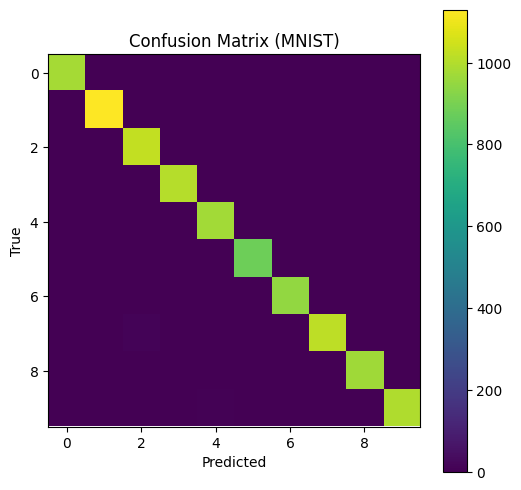

In [11]:
#Full display of my model with y_test and y_pred as Data to see where my model lacks
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix (MNIST)")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
model.save("mnist_cnn") #safe the model for later use